# Topic: Fake New Detection


## Business Understanding

To distinqush between fake new and real news

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Data Understanding

In [2]:
df = pd.read_csv(r'C:\Users\vince\Desktop\Project\FAKE NEW DATASET\Fake.csv')
df1 = pd.read_csv(r'C:\Users\vince\Desktop\Project\FAKE NEW DATASET\True.csv')

## Visualise the dataset

In [94]:
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [95]:
df1.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Create a target class

In [3]:
df['class']=0
df1['class']=1

## Marging the two dataframe

In [4]:
data = pd.concat([df1, df], axis =0)

In [42]:
data.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [43]:
data.shape

(44898, 5)

In [45]:
data['class'].value_counts()

0    23481
1    21417
Name: class, dtype: int64

In [5]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


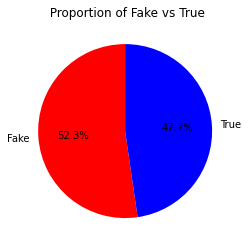

In [47]:
Detail = ['Fake', 'True']
colors =['r', 'b']
plt.pie(data['class'].value_counts(), labels = Detail, colors=colors, startangle=90, autopct='%.1f%%')
plt.rcParams['figure.figsize'] = (6,4)
plt.title(' Proportion of Fake vs True')
plt.show()

# Data Preparation

In [98]:
data=data.drop(['subject','date'],axis=1)

In [49]:
data

,title,text,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [73]:
x=data['text']

In [74]:
df=data
y=data['class']

# Modelling

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(x_train)
xv_test=vectorizer.transform(x_test)

## LogisticRegression

In [77]:
LR=LogisticRegression()

In [79]:
LR.fit(xv_train,y_train)

LogisticRegression()

In [80]:
pred=LR.predict(xv_test)

In [81]:
LR.score(xv_test,y_test)

0.9864587973273942

In [89]:
y_prob_LR = LR.predict_proba(xv_test)[:,1]


# Model Evaluation for logistic regression 

In [91]:
roc_auc_score(y_test, y_prob_LR)

0.9984585785963556

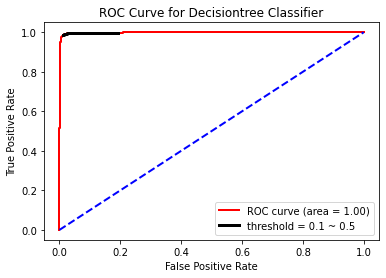

In [90]:
# make the ROC curve
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score
fpr, tpr, thresh = roc_curve(y_test, y_prob_LR, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decisiontree Classifier')
plt.legend(loc="lower right")
plt.show()

# TreeClassifier

In [82]:
DTC = tree.DecisionTreeClassifier()
DTC.fit(xv_train, y_train)

DecisionTreeClassifier()

In [83]:
DTC.score(xv_test,y_test)

0.9964365256124722

In [84]:
y_prob = DTC.predict_proba(xv_test)[:,1]


# Model Evaluation for TreeClassifier

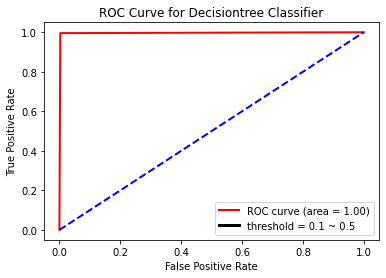

In [88]:
# make the ROC curve
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score
fpr, tpr, thresh = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = roc_auc_score(y_test, y_prob)

# These are the points at threshold = 0.1~0.5
x1 = fpr[(thresh <= 0.5) & (thresh >= 0.1)] 
x2 = tpr[(thresh <= 0.5) & (thresh >= 0.1)]

fig = plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.plot(x1, x2, color='k', lw=3, label='threshold = 0.1 ~ 0.5')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decisiontree Classifier')
plt.legend(loc="lower right")
plt.show()